In [ ]:
 #Assignment 2: Exploring Indian States Data

In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/india-state-wise-data-analysis.csv')

# Let's take a quick look at the dataset
df.head()


,State & District,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,"district_code:1, state_name:JAMMU AND KASHMIR,...",870354,474190,396164,439654,282823,156831,1048,1046,2,...,74948,39709,21751,6402,405015,289765,694780,600759,178435,89679
1,"district_code:2, state_name:JAMMU AND KASHMIR,...",753745,398041,355704,335649,207741,127908,368,343,25,...,66459,41367,27950,6857,374972,342646,717618,503223,160933,88978
2,"district_code:3, state_name:JAMMU AND KASHMIR,...",133487,78971,54516,93770,62834,30936,488,444,44,...,16265,8923,6197,575,75493,32637,108130,70703,41515,21019
3,"district_code:4, state_name:JAMMU AND KASHMIR,...",140802,77785,63017,86236,56301,29935,18,12,6,...,16938,9826,3077,408,82938,39854,122792,87532,35561,17488
4,"district_code:5, state_name:JAMMU AND KASHMIR,...",476835,251899,224936,261724,163333,98391,556,406,150,...,46062,29517,13962,1884,288430,164044,452474,304979,109818,61334


In [ ]:
#Question 1: What is the population of each state?

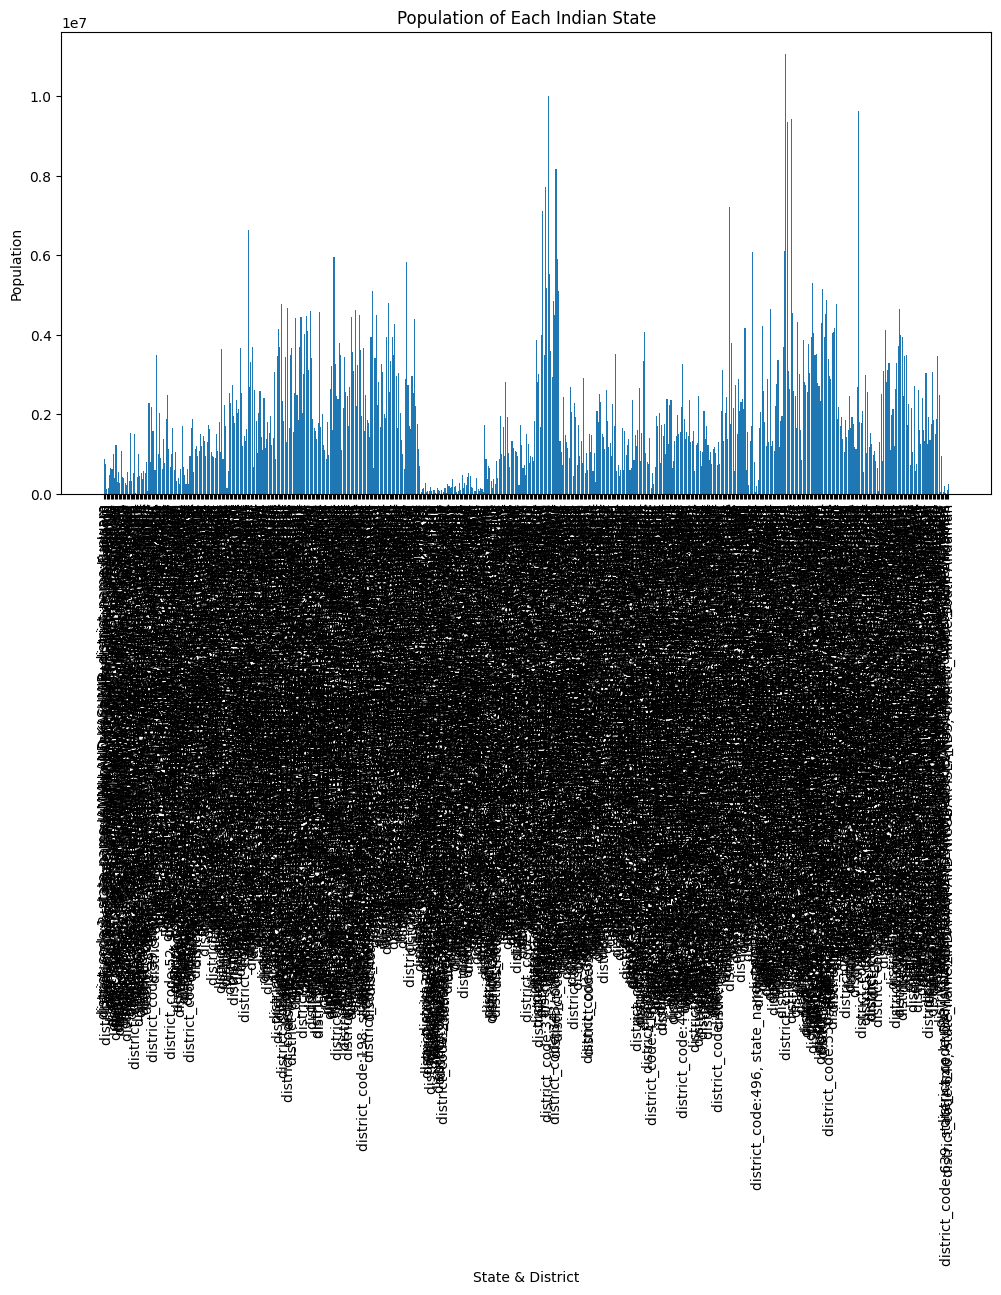

In [ ]:
 # Question 1: Population of each state
plt.figure(figsize=(12, 6))
plt.bar(df['State & District'], df['Population'])
plt.xlabel('State & District')
plt.ylabel('Population')
plt.title('Population of Each Indian State')
plt.xticks(rotation=90)
plt.show()



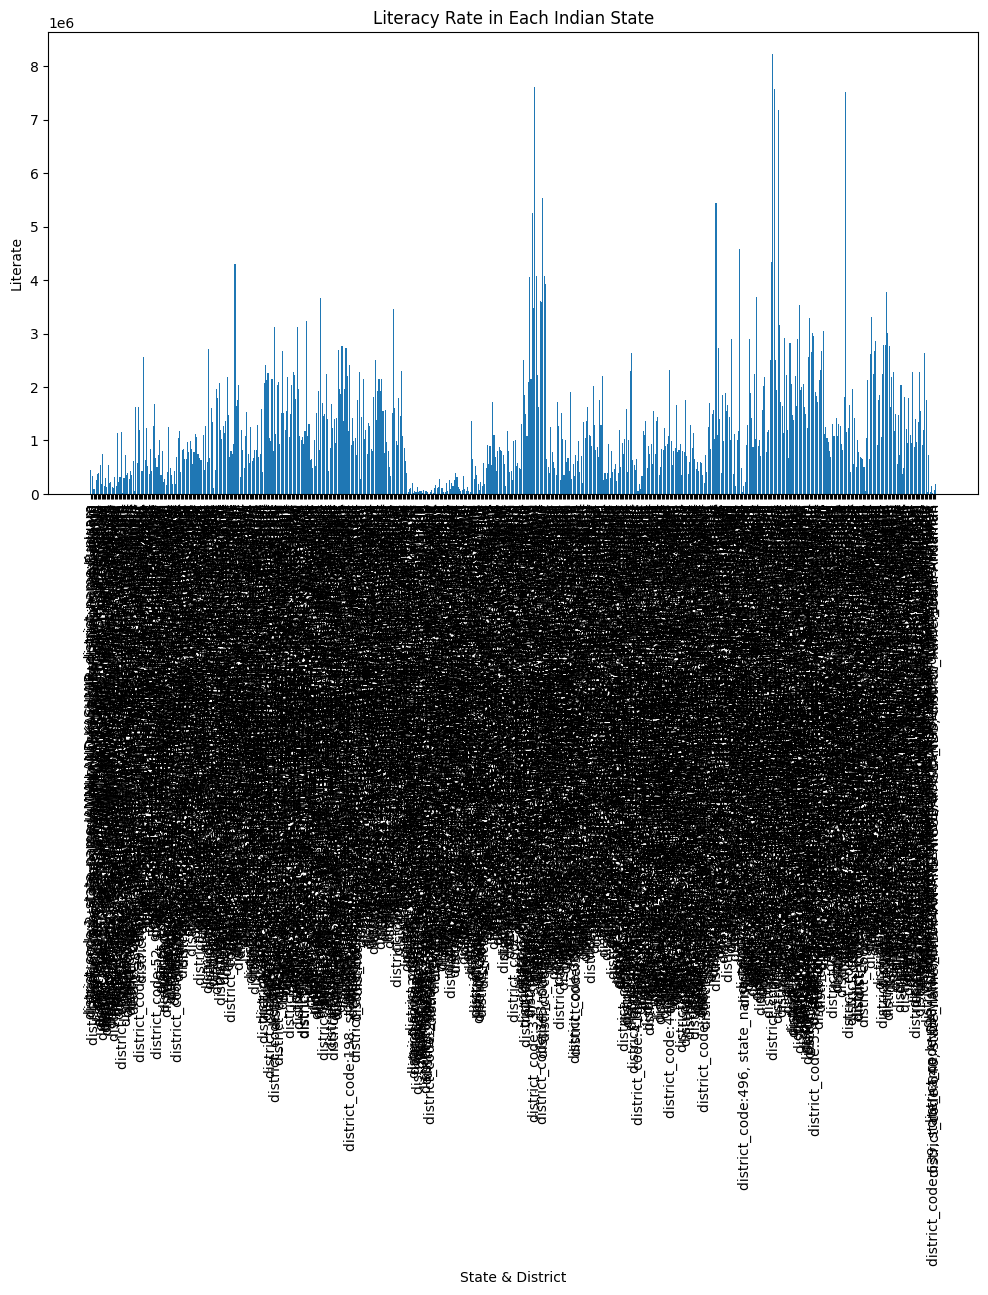

In [ ]:
# Question 1: Literacy rate in each state
plt.figure(figsize=(12, 6))
plt.bar(df['State & District'], df['Literate'])
plt.xlabel('State & District')
plt.ylabel('Literate')
plt.title('Literacy Rate in Each Indian State')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Question 2: What is the population of each state, and how does it vary?

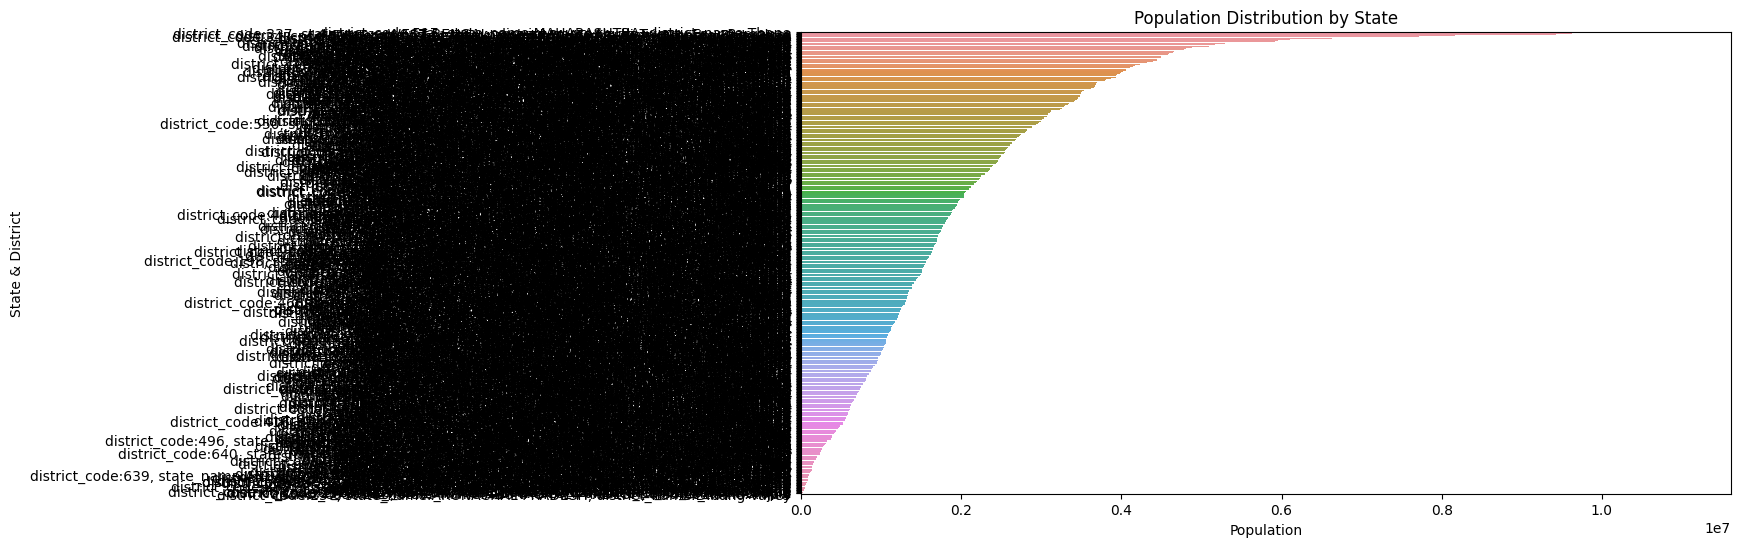

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate population by state
state_population = df.groupby('State & District')['Population'].sum().sort_values(ascending=False)

# Create a bar graph illustrating the population distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=state_population.values, y=state_population.index, orient='h')
plt.xlabel('Population')
plt.ylabel('State & District')
plt.title('Population Distribution by State')
plt.show()


In [ ]:
#Question 3: What is the gender distribution in the dataset?

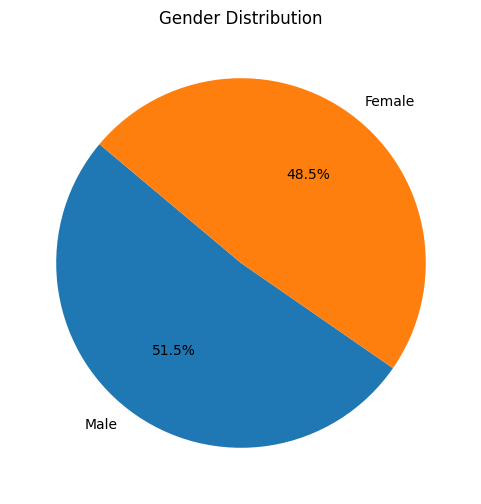

In [ ]:
# Calculate gender distribution
gender_distribution = df[['Male', 'Female']].sum()

# Create a pie chart illustrating the gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()


In [ ]:
#Question 4: What is the literacy rate in each state, and how does it vary by gender?

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


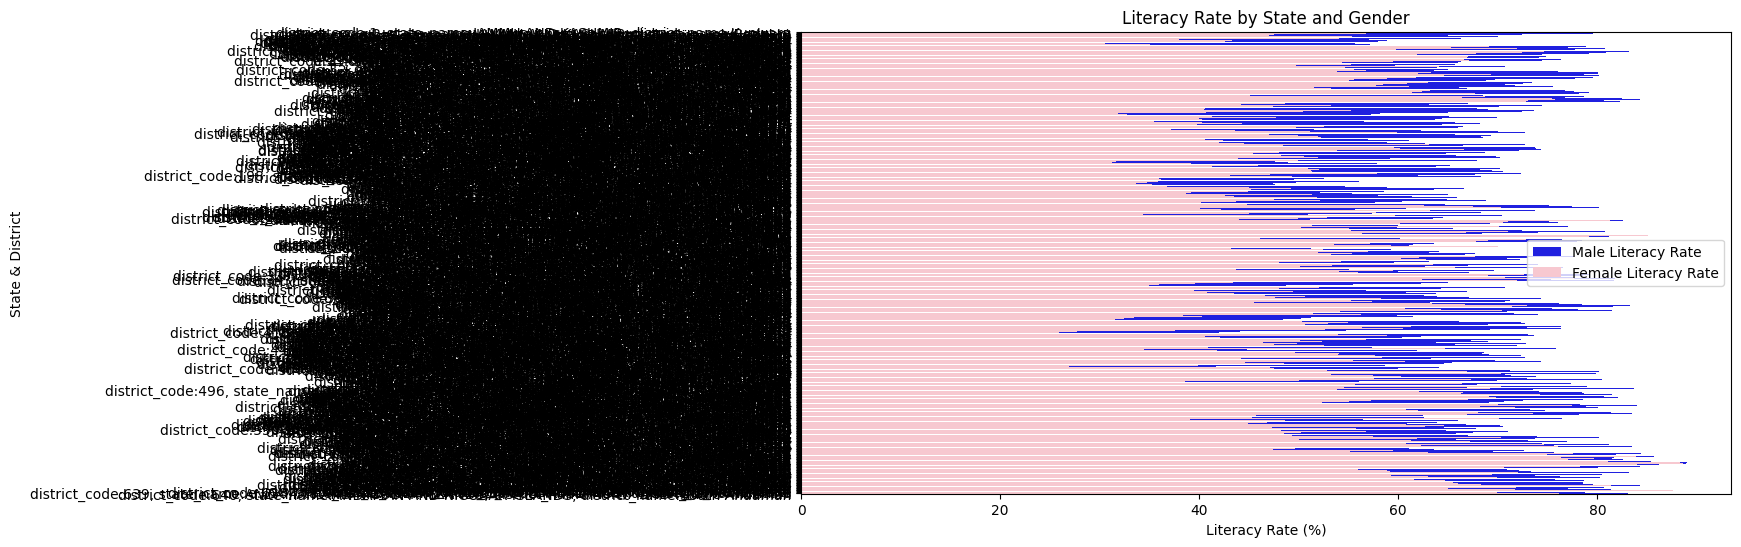

In [ ]:
# Calculate literacy rates by state and gender
df['Literacy_Rate_Male'] = (df['Male_Literate'] / df['Male']) * 100
df['Literacy_Rate_Female'] = (df['Female_Literate'] / df['Female']) * 100

# Create a bar graph for literacy rates by state
plt.figure(figsize=(12, 6))
sns.barplot(x='Literacy_Rate_Male', y='State & District', data=df, label='Male Literacy Rate', color='blue')
sns.barplot(x='Literacy_Rate_Female', y='State & District', data=df, label='Female Literacy Rate', color='pink')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('State & District')
plt.title('Literacy Rate by State and Gender')
plt.legend()
plt.show()


In [ ]:
#Question5 : What is the distribution of different education levels by state?

<Figure size 1200x600 with 0 Axes>

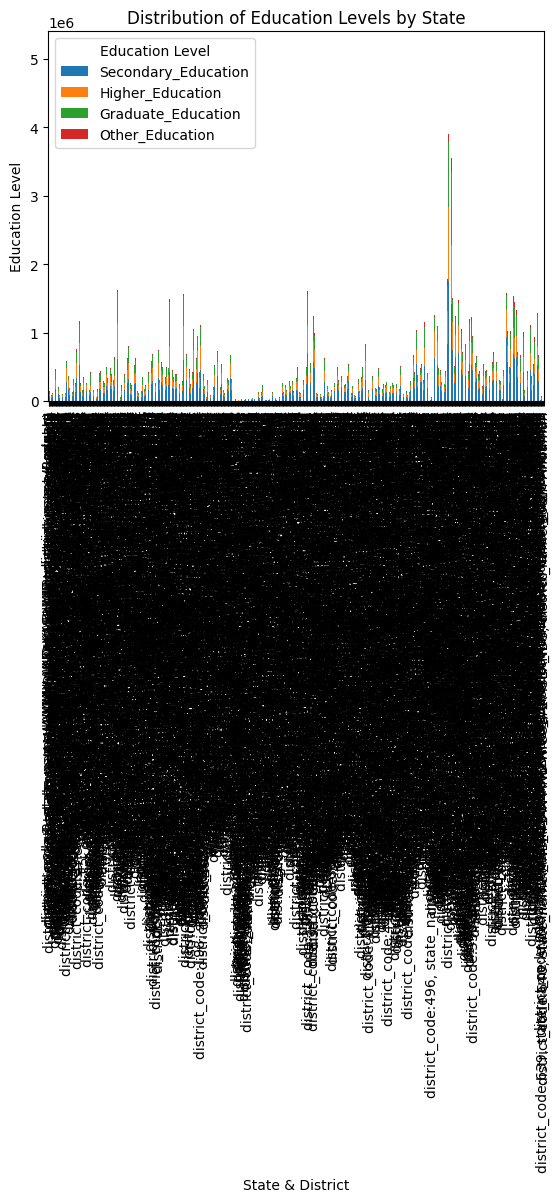

In [ ]:
# Create a bar graph for education levels by state
education_levels = ['Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education']

plt.figure(figsize=(12, 6))
df[education_levels + ['State & District']].set_index('State & District').plot(kind='bar', stacked=True)
plt.xlabel('State & District')
plt.ylabel('Education Level')
plt.title('Distribution of Education Levels by State')
plt.legend(title='Education Level')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Question 6: What is the distribution of age groups in the dataset?

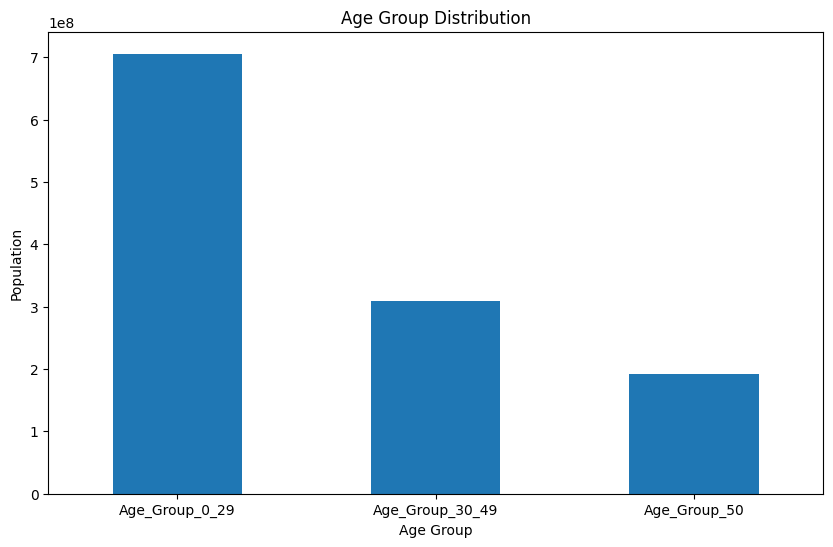

In [ ]:
# Create a bar graph for age group distribution
age_groups = ['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']

plt.figure(figsize=(10, 6))
df[age_groups].sum().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.title('Age Group Distribution')
plt.xticks(rotation=0)
plt.show()


In [ ]:
#Question 7: What is the correlation between education levels and literacy rates?

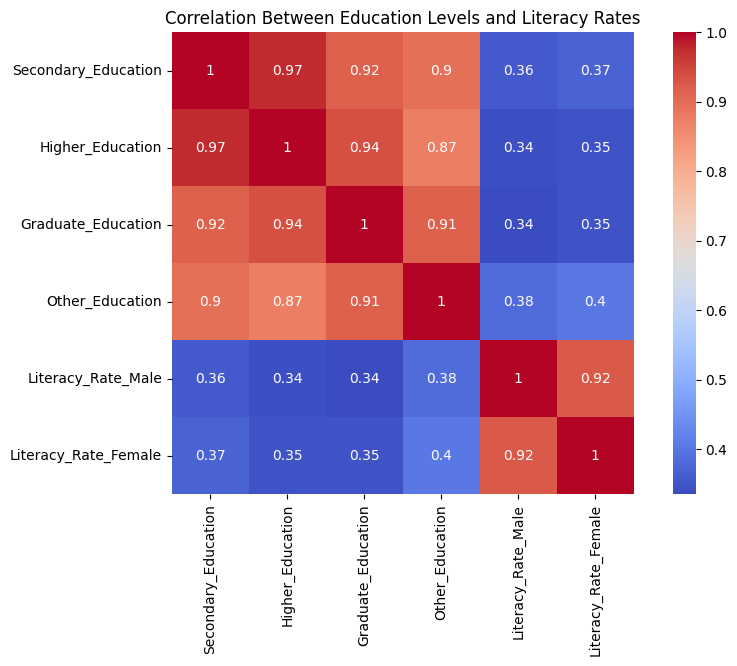

In [ ]:
# Calculate correlation between education levels and literacy rates
correlation_matrix = df[['Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education', 'Literacy_Rate_Male', 'Literacy_Rate_Female']].corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between Education Levels and Literacy Rates')
plt.show()


In [ ]:
#Question 8: Is there a relationship between SC (Scheduled Castes) population and education levels?

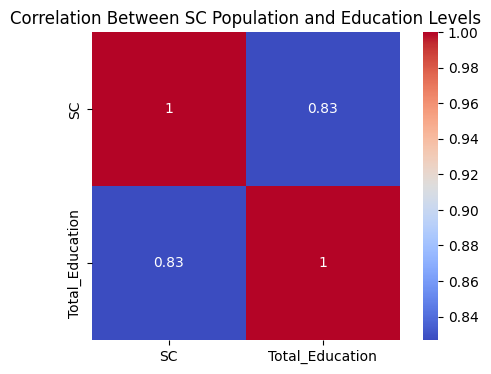

In [ ]:
# Calculate correlation between SC population and education levels
correlation_sc_education = df[['SC', 'Total_Education']].corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_sc_education, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between SC Population and Education Levels')
plt.show()


In [ ]:
#Question 9: What is the distribution of illiterate vs. literate populations by state?

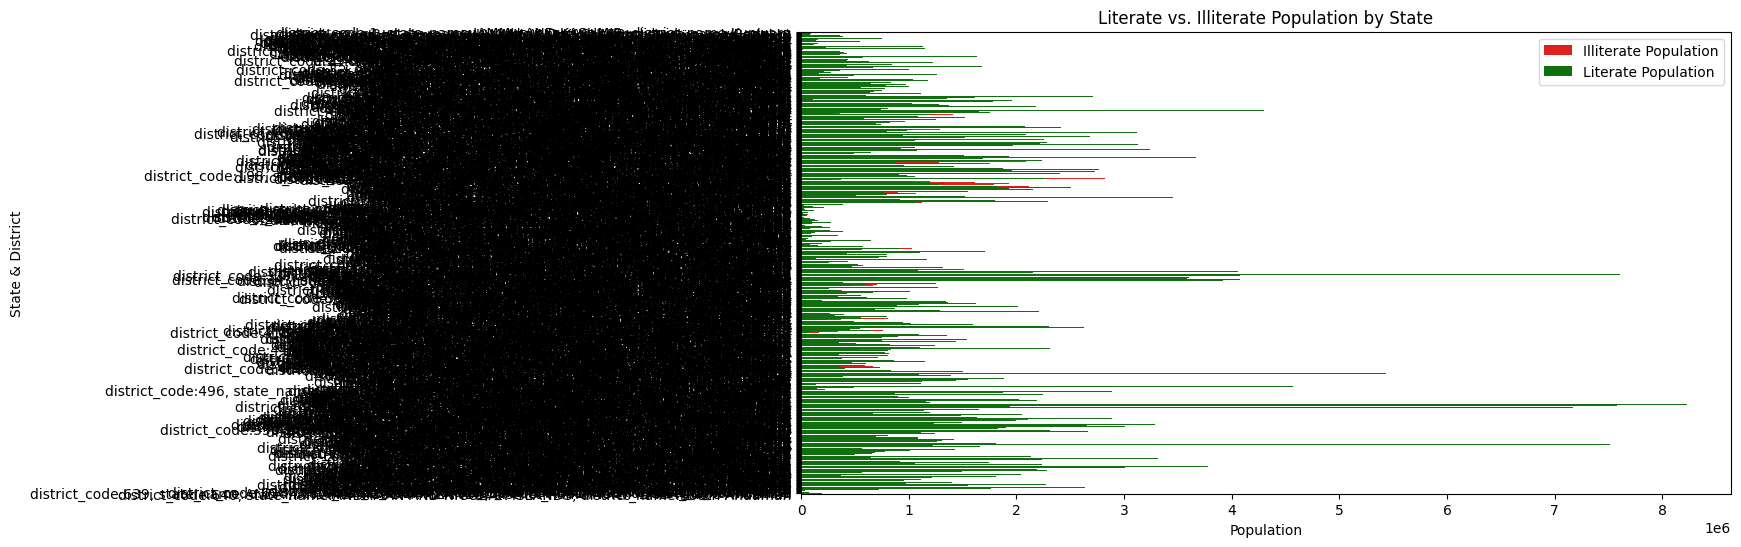

In [ ]:
# Calculate illiterate population by state
df['Illiterate_Population'] = df['Population'] - df['Literate']

# Create a bar graph illustrating illiterate vs. literate populations by state
plt.figure(figsize=(12, 6))
sns.barplot(x='Illiterate_Population', y='State & District', data=df, label='Illiterate Population', color='red')
sns.barplot(x='Literate', y='State & District', data=df, label='Literate Population', color='green')
plt.xlabel('Population')
plt.ylabel('State & District')
plt.title('Literate vs. Illiterate Population by State')
plt.legend()
plt.show()


In [ ]:
#Question 10 : How does the literacy rate vary with age group?

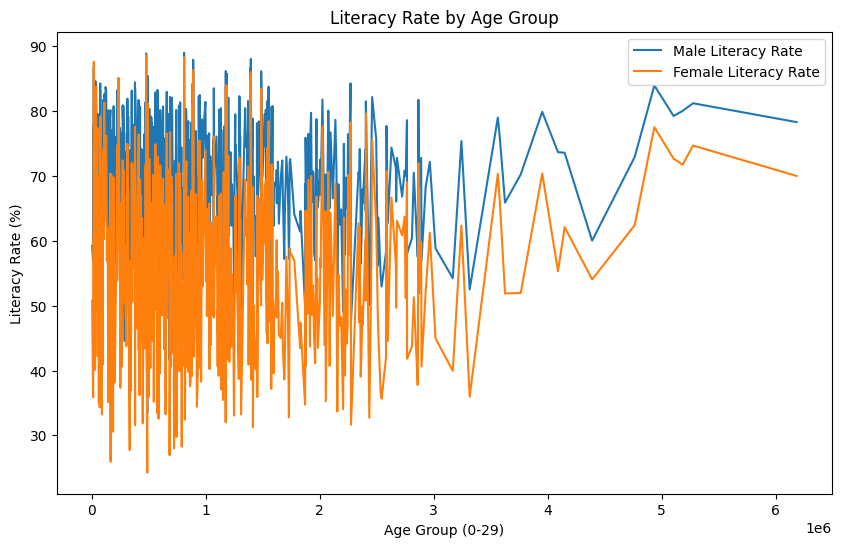

In [ ]:
# Create a line plot to visualize the literacy rate by age group
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age_Group_0_29', y='Literacy_Rate_Male', label='Male Literacy Rate')
sns.lineplot(data=df, x='Age_Group_0_29', y='Literacy_Rate_Female', label='Female Literacy Rate')
plt.xlabel('Age Group (0-29)')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rate by Age Group')
plt.legend()
plt.show()


In [ ]:
#Question 11: What is the average education level by state and how does it correlate with literacy rate?

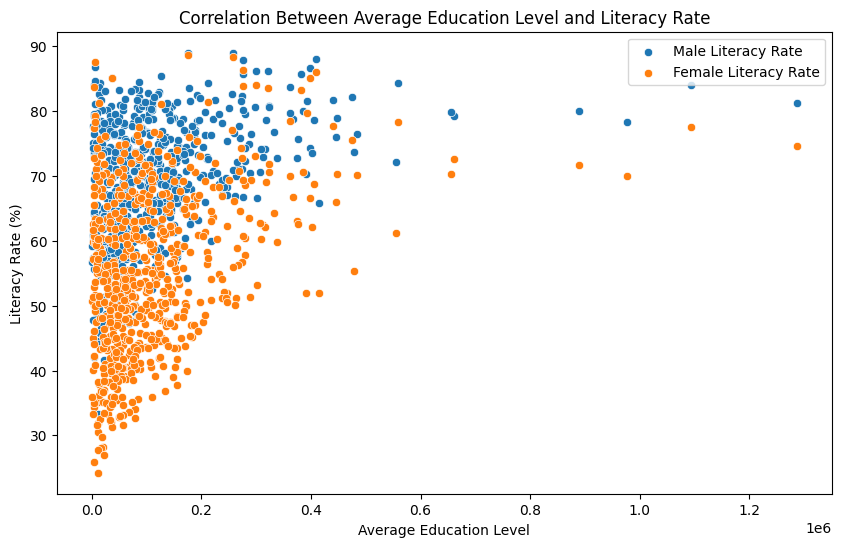

In [ ]:
# Calculate the average education level by state
df['Average_Education'] = df[education_levels].mean(axis=1)

# Create a scatterplot to visualize the correlation between average education level and literacy rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average_Education', y='Literacy_Rate_Male', label='Male Literacy Rate')
sns.scatterplot(data=df, x='Average_Education', y='Literacy_Rate_Female', label='Female Literacy Rate')
plt.xlabel('Average Education Level')
plt.ylabel('Literacy Rate (%)')
plt.title('Correlation Between Average Education Level and Literacy Rate')
plt.legend()
plt.show()
